<a href="https://colab.research.google.com/github/darkway30/darkway30-Retail_Forecasting/blob/master/Online_Transactions%20P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data visualization
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Part one: We start Understaning our Data.

In [ ]:
# Readin our CSV file trasactions to start analysing the prameters
data = pd.read_csv('Online_Retail.csv', encoding = 'unicode_escape')


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesData
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Whats the shape of our data
# This Dataset contains 532619 rows and 8 columns
data.shape

(541909, 8)

In [ ]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   SalesData    541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


From the data information insight InvoiceNo should be int64; there must be something incorrect with this variable. When attempting to use df.InvoiceNo.astype('int64') I receive an error. it's impossible to convert str into an int, meaning wrong listings in the data. 

We can recognize that there are 532619 entries from Data Information, and these are the transactions I'll try to analyze. 
There is two float type column ('UnitPrice', 'CustomerID)
An integer type column ('Quantity'). 
Five object type column ('InvoiceNo',StockCode','Description','InvoiceDate','Country') 

In [ ]:
# Description to look for any Null Values before cleaning
data.describe()

,Quantity,UnitPrice,CustomerID,SalesData
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [ ]:
Null_percentage = data.isnull().sum() / data.shape[0] * 100
Null_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

Approximately 25 % of the customers are unknown or Null, and 0.2% items were missing; these values that we'll have to remove to better understand the actual data. 

In [ ]:
# now we can get an idea about the actual numbers
data.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

With this information, we need to point to the business owner that we're missing a lot 25% is an immense value to miss. Something they can work on recovering.

We move to the next step: Cleaning our data to be more comfortable and more precise to analyze.

In [ ]:
# Remving the missing values with Panda Drop format
data = data.dropna()
data.shape

(406829, 8)

In [ ]:
# making sure that our data is not missing in more values
data.isnull().sum().sum()

0

Part three: let's explore our parameters
Countries/Stock that we can Visualize later to understand the countries we should focus on and the Items sold.

Analyzing Customers  based on orders:

1) Invoices
2) Items prusched
3) Item describtion
4) Recent order made per customer

In [ ]:
# How many Unique Invoices made in our 40+ Data
data.InvoiceNo.nunique()

22190

Stock items

In [ ]:
# How many Unique Items(Stock Code) made in our 40+ Data
data.StockCode.nunique()


3684

In [ ]:
StockCodes = data.StockCode.value_counts().sort_values(ascending=False)

Plotting the most common StockCodes

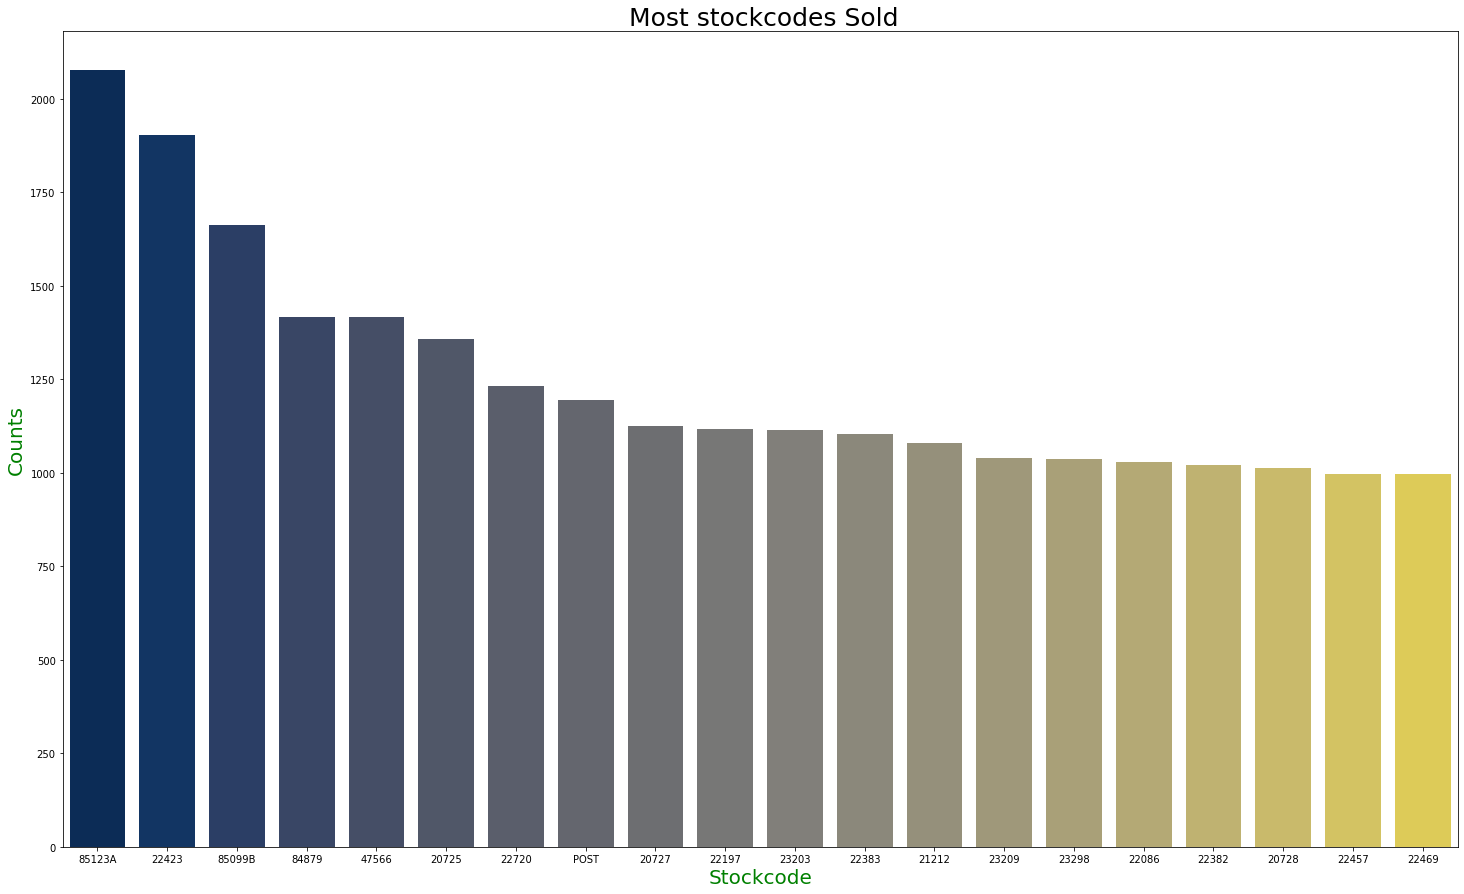

In [ ]:
plt.subplots(figsize=(25,15))
Z =sns.barplot(x = StockCodes.iloc[0:20].index, y=  StockCodes.iloc[0:20].values, palette="cividis")
plt.ylabel("Counts", color = 'green', fontsize= 20)
plt.xlabel("Stockcode",color = 'green', fontsize= 20)
plt.title(" Most stockcodes Sold", fontsize = 25);

In [ ]:
Z.figure.savefig('Most stockcodes Sold.png')
files.download('Most stockcodes Sold.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descriptions

In [ ]:
data.Description.nunique()

3896

In [ ]:
ItemName = data.Description.value_counts().sort_values(ascending=False)

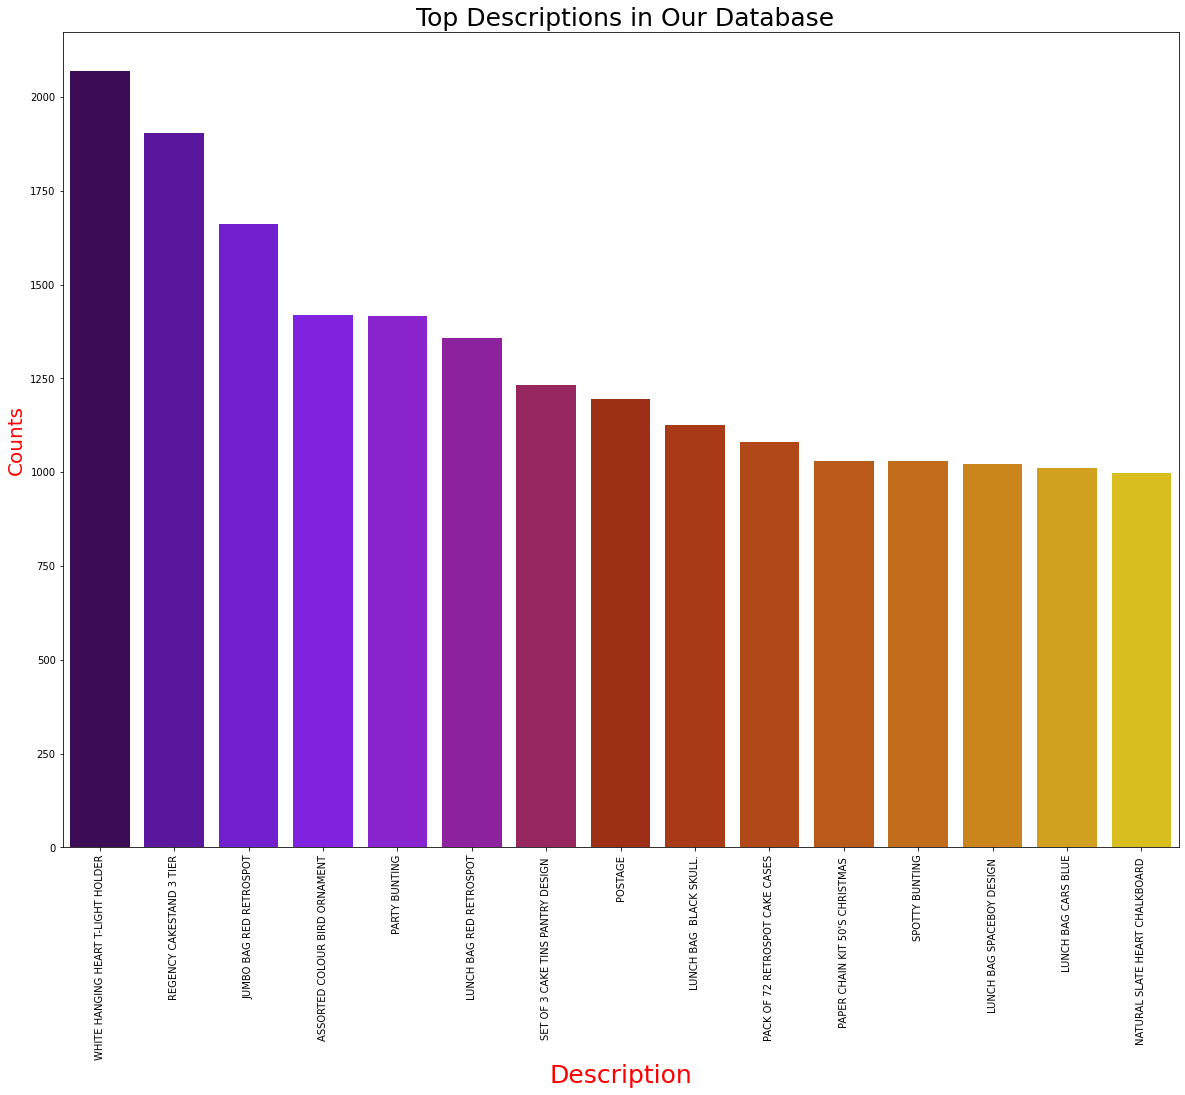

In [ ]:
plt.subplots(figsize=(20,15))
Z1 =sns.barplot(x = ItemName.iloc[0:15].index, y= ItemName.iloc[0:15].values, palette="gnuplot")
plt.ylabel("Counts", color = 'red', fontsize= 20)
plt.xlabel("Description",color = 'red', fontsize= 25)
plt.title(" Top Descriptions in Our Database", fontsize = 25)
plt.xticks(rotation=90);

In [ ]:
Z1.figure.savefig('TopDes.png')
files.download('TopDes.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Since we have only 22190 Unique invoices, let's analyze our customers and look at their total number of transactions made this year and their last purchase.
However, in a later step, a NaN Description shows us a failed transaction, so we will have to deal with NaN values to analyze our customers better.

In [ ]:
# Changing our CustomerID data to get a more accurate results.

In [ ]:
data['CustomerID'] = data['CustomerID'].astype(str)

The top 20 Customers with most numbers of trasactions

In [ ]:
data.CustomerID.nunique()

4372

In [ ]:
TopC = data.CustomerID.value_counts().sort_values(ascending=False)

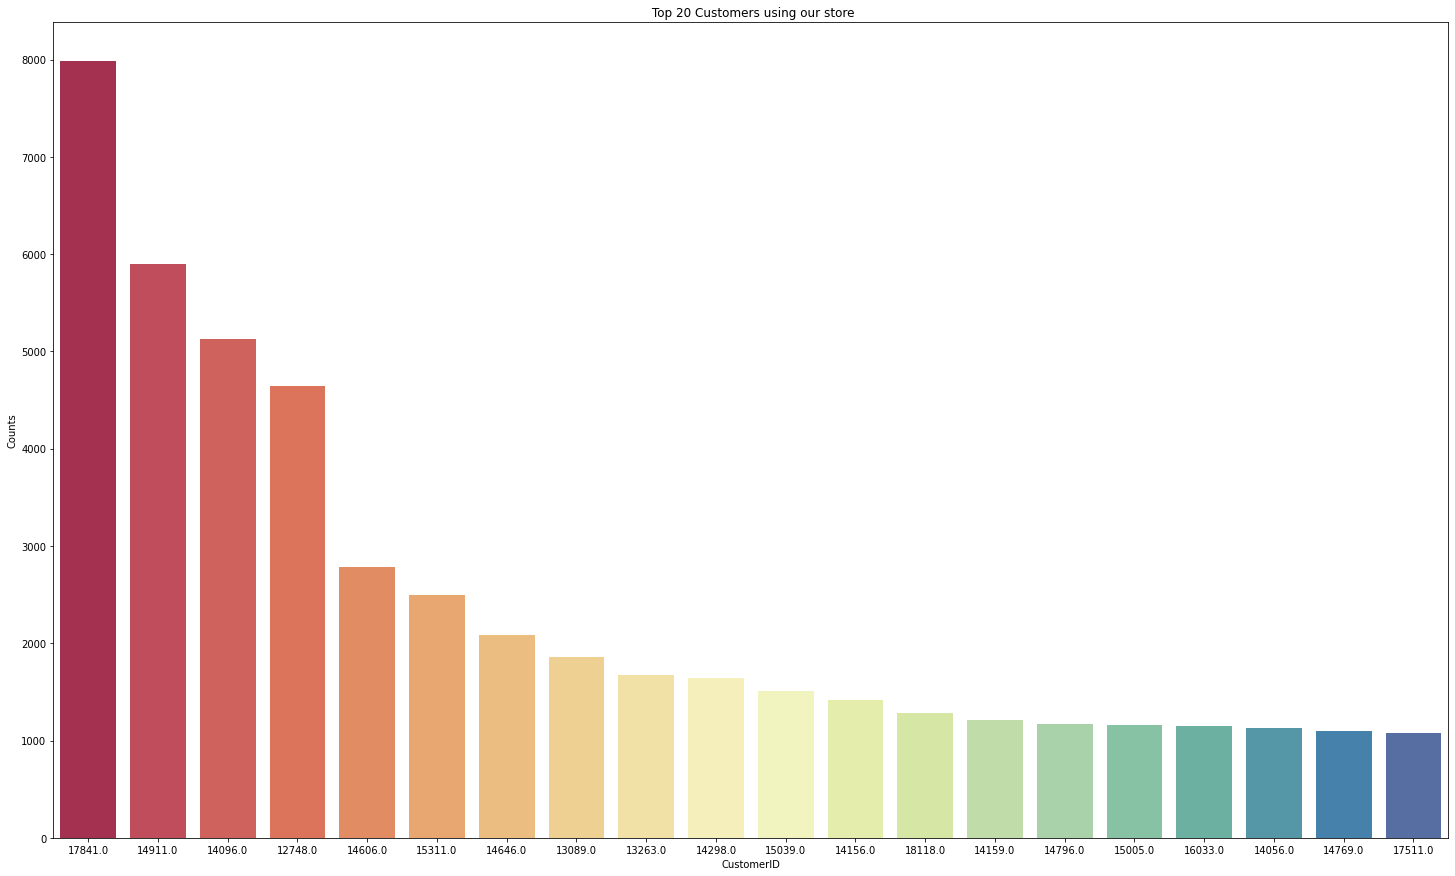

In [ ]:
plt.subplots(figsize=(25,15))
z = sns.barplot(x = TopC.iloc[0:20].index, y= TopC.iloc[0:20].values, palette="Spectral")
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title(" Top 20 Customers using our store");

In [ ]:
z.figure.savefig('Top20Customers.png')
files.download('Top20Customers.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# amount = [the items sold] x [price]
data['Amount'] = data['Quantity']*data['UnitPrice']
# pandas. DataFrame. groupby to sum our to values
total_t = data.groupby('CustomerID')['Amount'].sum()

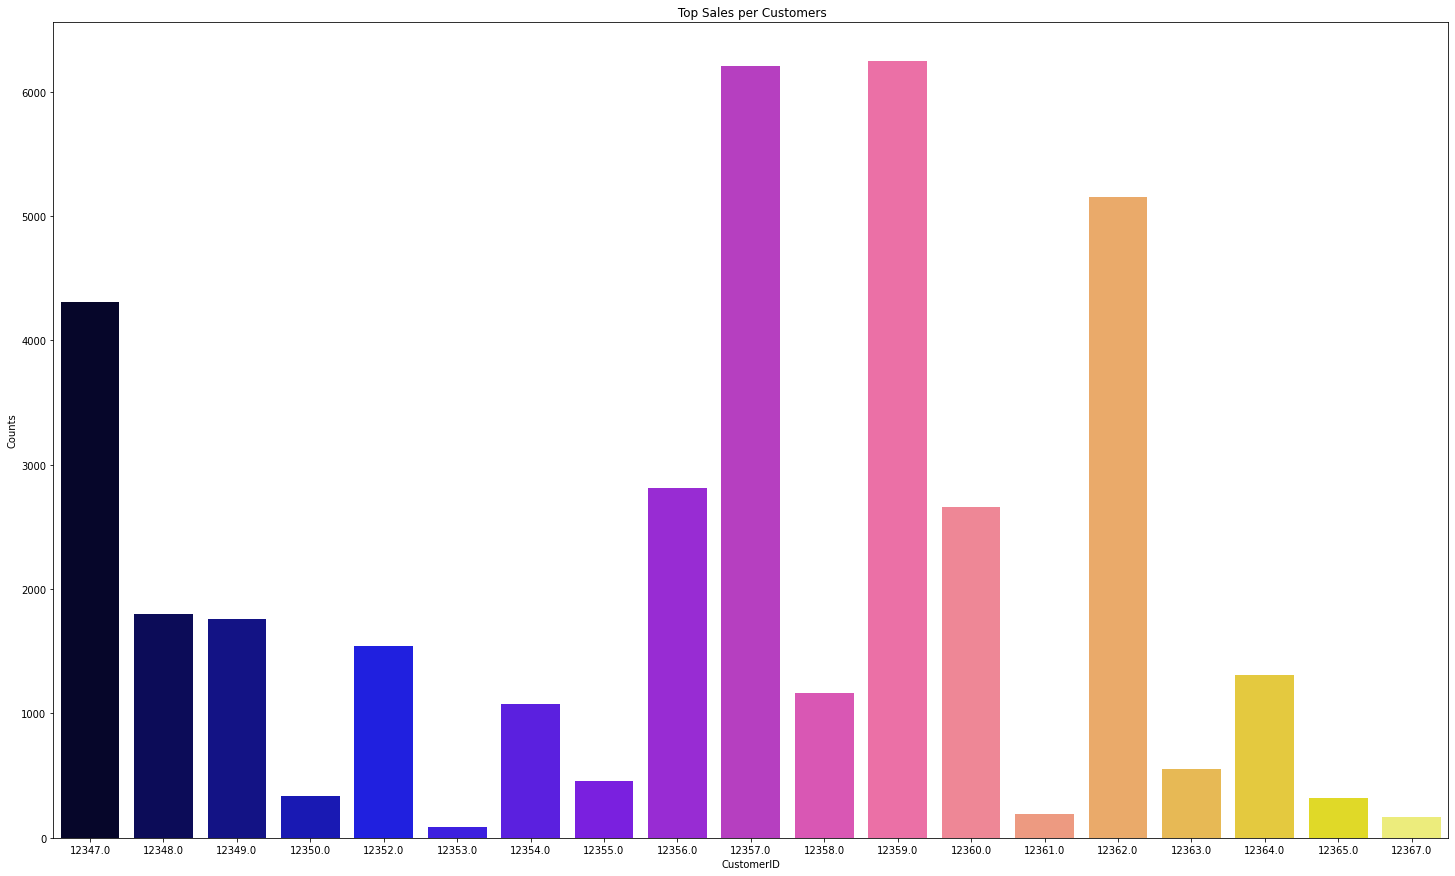

In [ ]:
# top sales made per customers
plt.subplots(figsize=(25,15))
z = sns.barplot(x = total_t.iloc[1:20].index, y= total_t.iloc[1:20].values, palette="gnuplot2")
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title(" Top Sales per Customers");

In [ ]:
z.figure.savefig('CustomersDistr.png')
files.download('CustomersDistr.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# let's explore our first attribute
total_t.head()


,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


We'll go more in-depth with our data to pinpoint the transactions flow: Countries, Customers, and items.
This method can help us with our Time Series report for a specific country or region. 


Focusing on the top Countries and the most Items sold

In [ ]:
# checking the different values for the top 20 countries
Top20UK = data['Country'].value_counts().head(2)

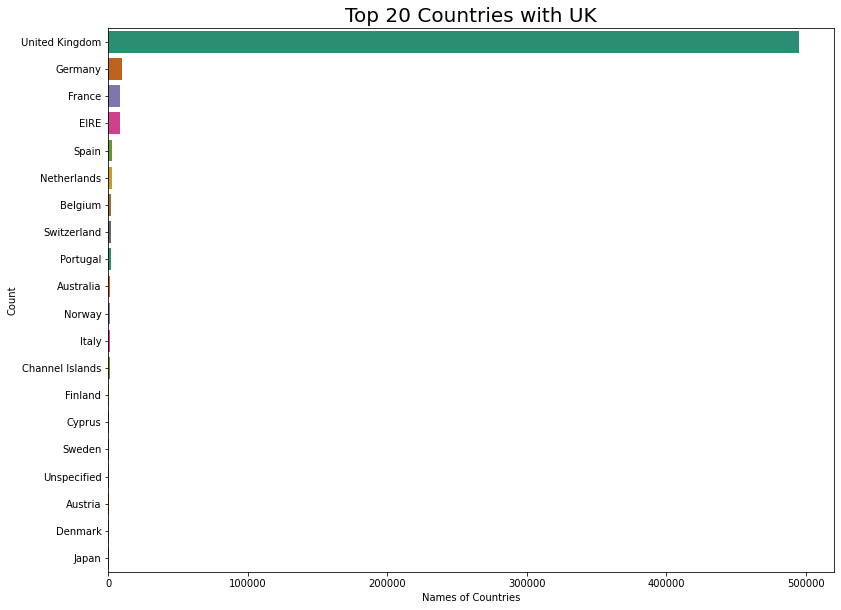

In [ ]:
plt.rcParams['figure.figsize'] = (13, 10)
z= sns.barplot(x = Top20UK.values, y = Top20UK.index, palette = 'Dark2')
plt.title('Top 20 Countries with UK', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

In [ ]:
from google.colab import files
z.figure.savefig('Top20CountriesW-UK.png')
files.download('Top20CountriesW-UK.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Let's focus without UK

Most Items sold to each Country: Top 20

In [ ]:
# TopQ20 variable will store the most items sold to the top 20 Countries
# not including UK, we will analyze UK sales later on
TopQ20 = data['Quantity'].groupby(data['Country']).agg('sum').sort_values(ascending = False)[1:21]
print(TopQ20)

Country
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Australia           83653
Sweden              35637
Switzerland         30325
Spain               26824
Japan               25218
Belgium             23152
Norway              19247
Portugal            16180
Finland             10666
Channel Islands      9479
Denmark              8188
Italy                7999
Cyprus               6317
Singapore            5234
Austria              4827
Hong Kong            4769
Name: Quantity, dtype: int64


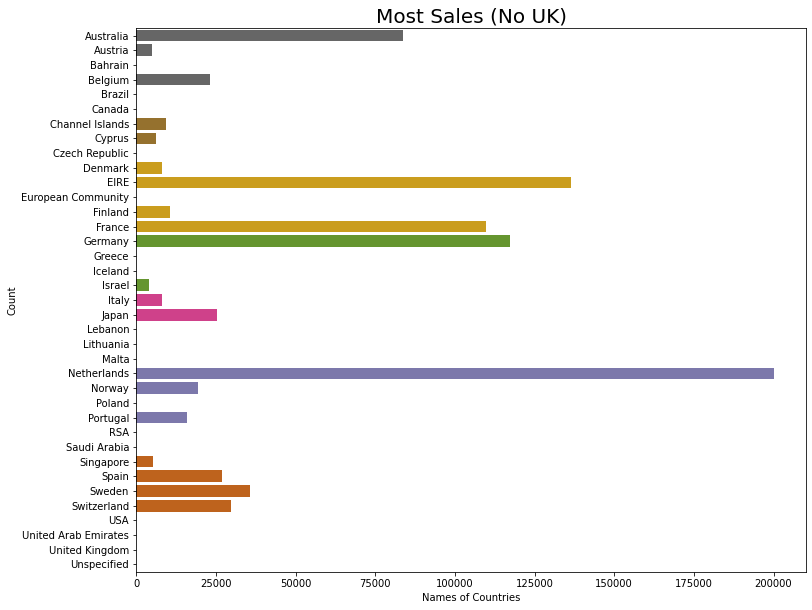

In [ ]:
# now let us plot our top 20 Countries using our online store
# that will help us when reporting (using barplot)
# storing our top countries in 'top20' and then plot it
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 10)
top20 = data['Quantity'].groupby(data['Country']).agg('sum').sort_values(ascending = False)[1:21]
z= sns.barplot(x = top20.values, y = top20.index, palette = 'Dark2_r')
plt.title('Most Sales (No UK)', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

In [ ]:
z.figure.savefig('Top20CountriesWithout-UK.png')
files.download('Top20CountriesWithout-UK.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Show the most sales

I got stuck here for a bit; to better use our data, we can't show the Sales dependent on one variable: the Unit prices or the quantity sold.
We must create a new column to store unit price*Quantity = SalesData. It will be helpful later on with our visualization stage.

In [ ]:
# Adding a new colum with the Sales Data
# SalesData = Quantity x Unit Price
data['SalesData'] = data['Quantity'] * data['UnitPrice']

In [ ]:
# Using the same panda groupby but choosing the salesDara variable
# TopS will show each country's salesData
# showing only the top 20 without UK to have a better plot.
TopS = data['SalesData'].groupby(data['Country']).agg('sum').sort_values(ascending = False)[1:11]

In [ ]:
# Printing the most most sales what countries?
print(TopS)

Country
Netherlands    284661.54
EIRE           250285.22
Germany        221698.21
France         196712.84
Australia      137077.27
Switzerland     55739.40
Spain           54774.58
Belgium         40910.96
Sweden          36595.91
Japan           35340.62
Name: SalesData, dtype: float64


Before moving to my next step, I'd like to look at the bottom countries using our "Store" to give us a better insight into how to target their market better. I guess that's what a Bussiness Intelligence Analyst will point at.

In [ ]:
BottomS= data['SalesData'].groupby(data['Country']).agg('sum').sort_values(ascending = True).head(20)
print(BottomS)

Country
Saudi Arabia              131.17
Bahrain                   548.40
Czech Republic            707.72
RSA                      1002.31
Brazil                   1143.60
European Community       1291.75
Lithuania                1661.06
Lebanon                  1693.88
USA                      1730.92
United Arab Emirates     1902.28
Malta                    2505.47
Unspecified              2667.07
Canada                   3666.38
Iceland                  4310.00
Greece                   4710.52
Israel                   6994.25
Poland                   7213.14
Singapore                9120.39
Austria                 10154.32
Cyprus                  12946.29
Name: SalesData, dtype: float64


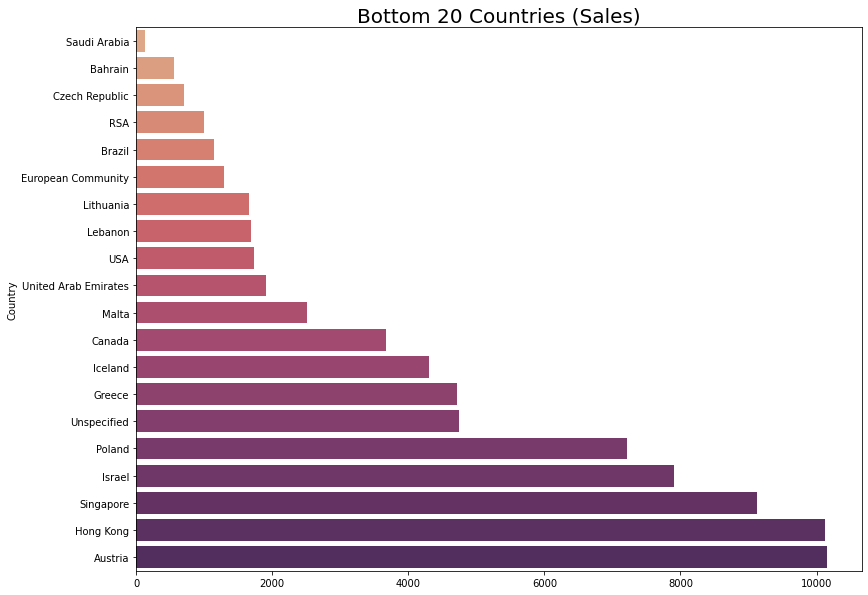

In [ ]:
plt.rcParams['figure.figsize'] = (13, 10)
z5= sns.barplot(x = BottomS.values, y = BottomS.index, palette = 'flare')
plt.title('Bottom 20 Countries (Sales)', fontsize = 20)
plt.show()

In [ ]:
z5.figure.savefig('BottomSalesCounties.png')
files.download('BottomSalesCounties.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


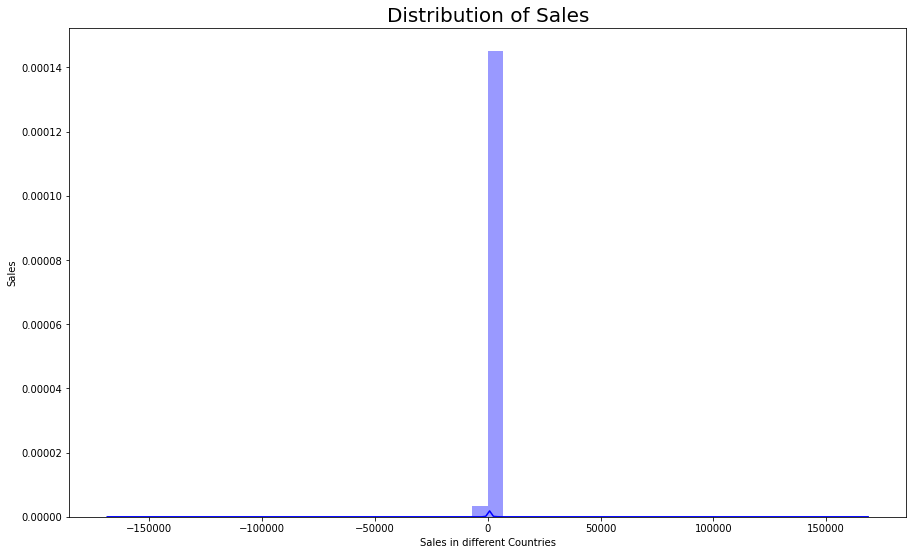

In [ ]:
# visualizing the sales in the entire globe
plt.subplots(nrows = 1, ncols=1, figsize= (15, 9))
sns.distplot(data['SalesData'], color = 'blue')
plt.title('Distribution of Sales', fontsize = 20)
plt.xlabel('Sales in different Countries')
plt.ylabel('Sales')
plt.show()


Checking missing and data types, I'll Experimenting with missingno Library after finding my CDS411 Notes with Dr.Kinser. Let's double-check that we're not dealing with any missing values before finalizing our cleaning stage and move to the real Analysis and Visualization part.

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
 8   Amount       406829 non-null  float64
 9   SalesData    406829 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 54.1+ MB
None


In [ ]:
data.InvoiceNo.astype('int64')

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:311: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:311: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


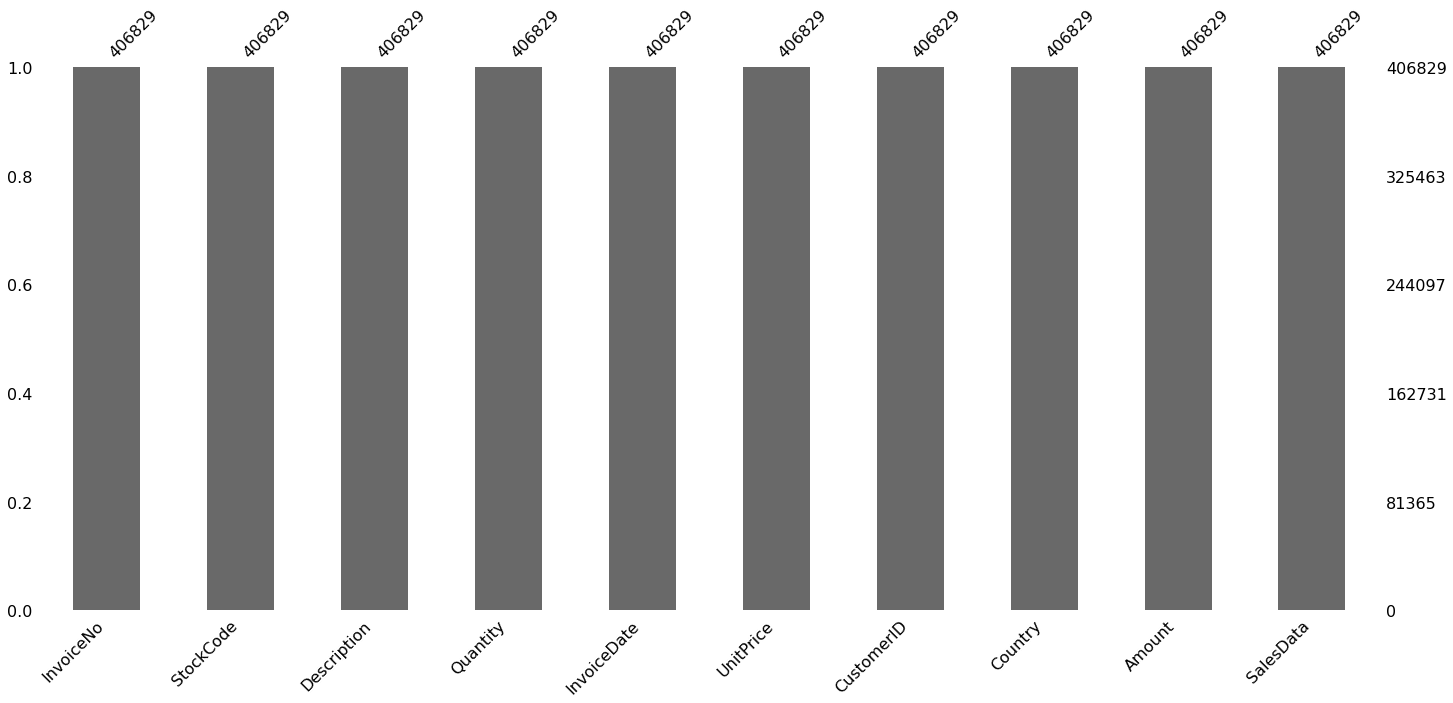

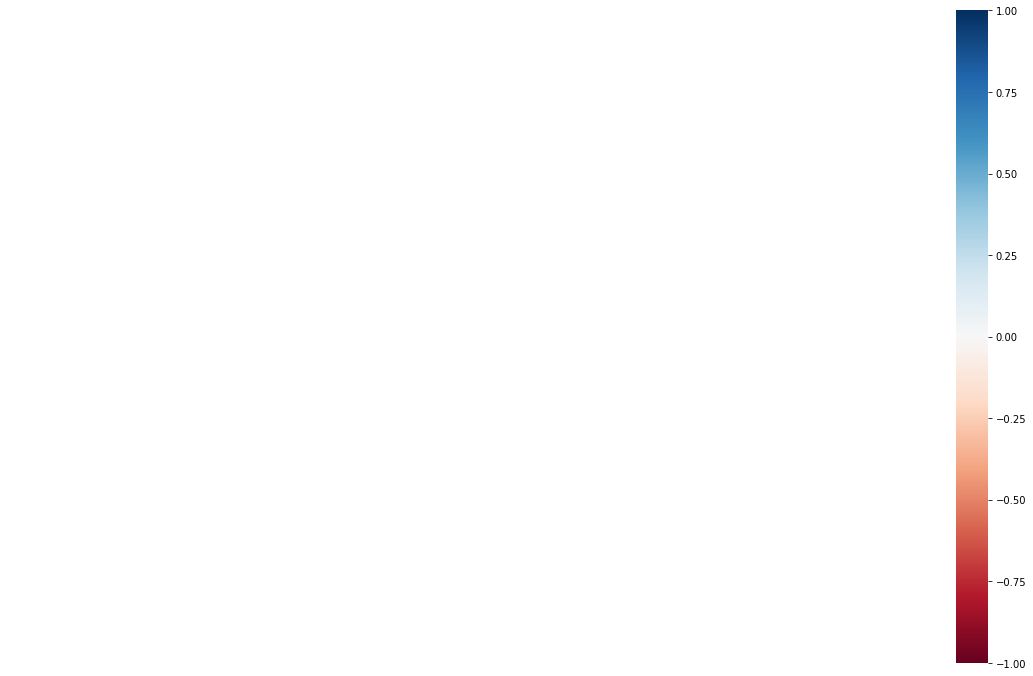

In [ ]:
import missingno as msno # Advanced missing values handling
msno.bar(data);
msno.heatmap(data);

Now we have a better understanding of what are the most and least countries we're benefiting from (Great data for our Market and advertising team to work on)
Now let's stop for a bit; we need to know the most items sold to those countries, but I also forgot that we have refunded or canceled transactions, so I hope it's already calculated.

We already have any idea of the numbers of uniwue trasactions but let us get an acurate value of the C or cancelead invoices.

In [ ]:
# Lambda provides runtimes for Python that run your code to process events.
data["Cancelled_Transactions"]=np.where(data.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
canceledT = data.Cancelled_Transactions.value_counts()
print(canceledT)
print(canceledT/ data.shape[0] * 100)

False    88145
True      1733
Name: Cancelled_Transactions, dtype: int64
False    98.071831
True      1.928169
Name: Cancelled_Transactions, dtype: float64


Data Visualization

What about thr countries with the most returned trasactions.

In [ ]:
data.Country = data.Country.astype('category')
# topInvoice = data['InvoiceNo'].groupby(data['Country']).agg('sum').sort_values(ascending = False)[1:21]
# print(topInvoice)

In [ ]:
plt.rcParams['figure.figsize'] = (13, 10)
z= sns.barplot(x = InvoiceNo.values, y = BottomS.index, palette = 'flare')
plt.title('Bottom 20 Countries (Sales)', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

In [ ]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
SalesData      0
Amount         0
dtype: int64


Now, let’s proceed with replacing null features with zero values, as we need to have a clean dataset to perform operations with it.

In [ ]:
data.fillna(0, inplace=True)
data.isnull().sum()

InvoiceNo                 0
StockCode                 0
Description               0
Quantity                  0
InvoiceDate               0
UnitPrice                 0
CustomerID                0
Country                   0
Cancelled_Transactions    0
dtype: int64

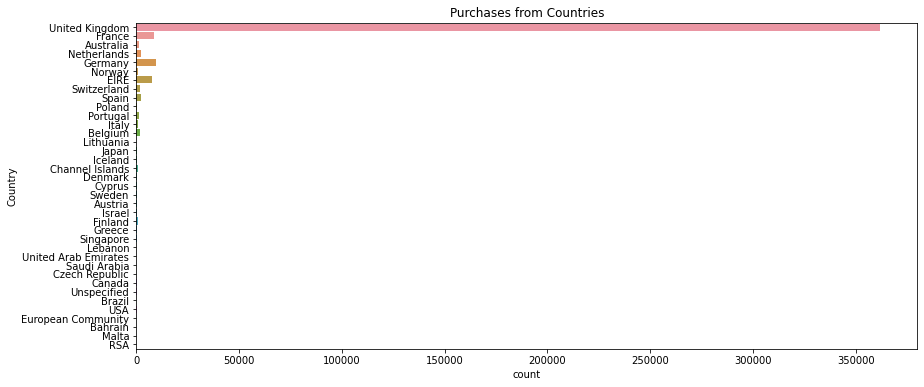

In [ ]:
# Plotting InvoiceNo distribution per Country
import seaborn as sns # Advanced data visualization
plt.figure(figsize=(14,6))
plt.title('Purchases from Countries');
sns.countplot(y='Country', data=data)

Time Series Plot and a Pie Char for sales throughout the year

In [ ]:
# importing Python datatime to seperate our 2011 and 201 sales
import datetime
data['month'] = pd.DatetimeIndex(data['InvoiceDate']).month
data['year'] = pd.DatetimeIndex(data['InvoiceDate']).year
import calendar
# Here we're creating a months coulum to store all Invoice dates by months
# data['Months'] = data['month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
# defing calander months fot the Y label per plot, didn;t really work well
def Months(NumbersM):
    MNames = [calendar.month_abbr[x] for x in NumbersM]
    return MNames

Text(0.5, 1.0, 'Time-Series plot for UK')

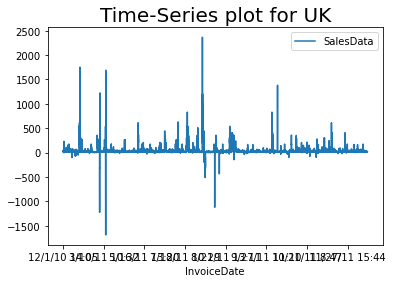

In [ ]:
# Grouping the 2010 Sales only 
def time_series(country):
  data1 = data[data['Country'] == country]
  data1.plot(x = 'InvoiceDate', y = 'SalesData')
  


In [ ]:
# We can run thos for different counties to have a better understandin
# I decided to move on with cleaned and import it to Tableau to have a better
# Visulization for different prameters.
dataset = data[data['Country'] == 'Germany']
dataset.plot(x = 'InvoiceDate', y = 'SalesData')
plt.title('Time Series for EIRE', fontsize = 20)
plt.xticks(rotation = -40)
plt.xlabel('Purchase Date')
plt.ylabel('Sales Numbers')
plt.show()

Defining my Time series to plot multiple countries AND export to Tableau for more Visulization analysis